In [1]:
import sys, os
sys.path.append(f'../../code')

import matplotlib.pyplot as plt

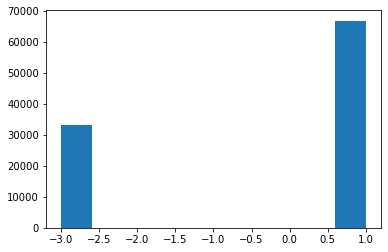

In [2]:
import json

def load_case(path):
    with open(path, 'r+') as file: return json.load(file)

case220504_mc_ht = load_case('220504-mc-ht.json')
plt.hist(case220504_mc_ht['energy_sample'])
plt.show()

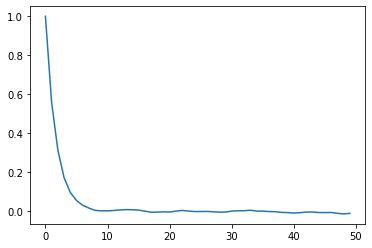

In [3]:
import numpy as np
def acrl(m, time_evolution):
    m = np.asarray(m)
    m_demean = m - np.mean(m)   # Demean the series
    # We are going to return a normalized autocorrelation function `c(t=0)=1`.
    nrm = np.var(m_demean)
    tot = len(m_demean)
    m_corr = np.empty(time_evolution)
    for t in range(time_evolution):
        m_corr[t] = 1 if nrm == 0 else np.mean(m_demean[t:] * m_demean[:tot - t]) / nrm

    return m_corr

plt.plot(acrl(case220504_mc_ht['energy_sample'], 50))